In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [5]:
df = pd.read_csv(filepath_or_buffer='uk_real_estate.csv',
                 names=['transaction_id', 'price', 'date_of_transfer', 'postcode', 'type', 'old/new',
                        'duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 
                        'County', 'PPDCategory_Type','Record_Status - monthly_file_only'],
                 parse_dates=['date_of_transfer']).drop(columns=['postcode', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 'County'])

df['year'] = df['date_of_transfer'].dt.year
df.head()

,transaction_id,price,date_of_transfer,type,old/new,duration,PPDCategory_Type,Record_Status - monthly_file_only,year
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07,D,N,F,A,A,1995
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03,T,N,F,A,A,1995
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13,T,N,F,A,A,1995
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28,T,N,F,A,A,1995
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28,S,N,F,A,A,1995


In [6]:
years = df['year'].value_counts().sort_index()
hourly_transactions = years / (365*24)
hourly_transactions

year
1995     90.969064
1996    110.169064
1997    124.913927
1998    119.897945
1999    136.379110
2000    128.901027
2001    142.196461
2002    154.291781
2003    141.009247
2004    140.607534
2005    121.148402
2006    151.356050
2007    145.220548
2008     74.149429
2009     71.370776
2010     75.708562
2011     75.471005
2012     76.348059
2013     92.565183
2014    112.403995
2015    115.344292
2016    119.335274
2017    121.671233
2018    118.189726
2019    115.042237
2020    100.766781
2021    139.288356
2022     98.449886
2023     14.714954
Name: count, dtype: float64

In [7]:
df_years = pd.DataFrame(hourly_transactions).transpose()
df_years.head()

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,90.969064,110.169064,124.913927,119.897945,136.37911,128.901027,142.196461,154.291781,141.009247,140.607534,...,112.403995,115.344292,119.335274,121.671233,118.189726,115.042237,100.766781,139.288356,98.449886,14.714954


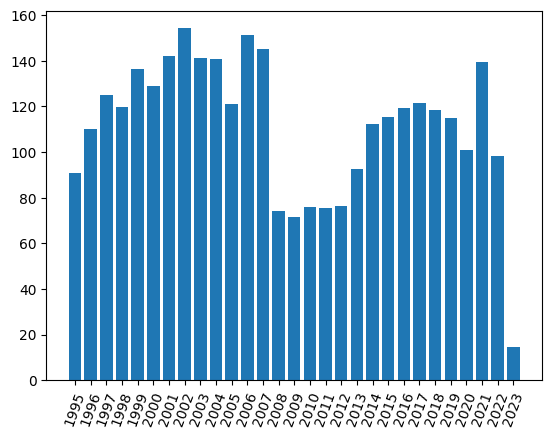

In [8]:
plt.bar(hourly_transactions.index, hourly_transactions.values)
plt.xticks([value for value in hourly_transactions.index], rotation=70)
plt.show()

In [9]:
stable_years = ((df_years.columns.astype(int) < 2008) | (df_years.columns.astype(int) > 2012))
df_stable = df_years.loc[:, stable_years]
df_stable.head()

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,90.969064,110.169064,124.913927,119.897945,136.37911,128.901027,142.196461,154.291781,141.009247,140.607534,...,112.403995,115.344292,119.335274,121.671233,118.189726,115.042237,100.766781,139.288356,98.449886,14.714954


In [10]:
crisis_years = df_years.columns.astype(int).isin([2008, 2009, 2010, 2011, 2012])
df_crisis = df_years.loc[:, crisis_years]
df_crisis.head()

year,2008,2009,2010,2011,2012
count,74.149429,71.370776,75.708562,75.471005,76.348059


In [11]:
stable_mean = df_stable.mean(axis=1).values[0]
crisis_mean = df_crisis.mean(axis=1).values[0]
stable_mean, crisis_mean

(118.95133656773213, 74.60956621004566)

In [12]:
# null -> crisis_mean = stable_mean -> p_value >= alpha
# alternative -> crisis_mean < stable_mean -> p_value < alpha

p_value = st.poisson.cdf(crisis_mean, stable_mean)
p_value

6.40249824459907e-06

In [ ]:
# alpha = 0.05
# p_value < alpha -> reject null -> crisis_mean < stable_mean